In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("taxi_fare.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


In [3]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

In [4]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
import pandas as pd
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    return c * r

df['trip_distance_haversine'] = haversine(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)
df.shape

(212345, 19)

In [7]:
import pytz
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [8]:

df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_localize('UTC')
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_convert('US/Eastern')

In [9]:
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].dt.tz_localize('UTC')
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].dt.tz_convert('US/Eastern')

In [10]:
df['pickup_day'] = df['tpep_pickup_datetime'].dt.weekday  
df['is_weekend'] = df['pickup_day'].apply(lambda x: 1 if x >= 5 else 0)
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['is_night'] = df['hour'].apply(lambda h: 1 if (h >= 20 or h < 6) else 0)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype                     
---  ------                   --------------   -----                     
 0   VendorID                 212345 non-null  int64                     
 1   tpep_pickup_datetime     212345 non-null  datetime64[ns, US/Eastern]
 2   tpep_dropoff_datetime    212345 non-null  datetime64[ns, US/Eastern]
 3   passenger_count          212345 non-null  int64                     
 4   pickup_longitude         212345 non-null  float64                   
 5   pickup_latitude          212345 non-null  float64                   
 6   RatecodeID               212345 non-null  int64                     
 7   store_and_fwd_flag       212345 non-null  object                    
 8   dropoff_longitude        212345 non-null  float64                   
 9   dropoff_latitude         212345 non-null  float64                   
 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_haversine,pickup_day,is_weekend,hour,is_night
0,1,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.5,2.05,0.00,0.3,12.35,3.138096,0,0,19,0
1,1,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.5,3.05,0.00,0.3,15.35,4.303331,0,0,19,0
2,2,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.5,8.00,0.00,0.3,63.80,16.600142,0,0,19,0
3,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,0.5,3.78,5.54,0.3,41.62,9.046547,0,0,19,0
4,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.0,0.00,15.50,0.3,113.80,20.400022,0,0,19,0


### cleaning

In [11]:
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_haversine,pickup_day,is_weekend,hour,is_night
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.0,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355,25.156607,1.687315,0.0,5.724156,0.676220
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129,435.567787,1.072912,0.0,4.877571,0.467918
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,1.155181,1.000000,0.0,3.000000,0.000000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000,1.937586,1.000000,0.0,4.000000,1.000000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000,3.565562,3.000000,0.0,6.000000,1.000000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000,8713.463111,3.000000,0.0,23.000000,1.000000


In [12]:
df[(df["dropoff_longitude"] == 0.0) | (df["pickup_longitude"] == 0.0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_haversine,pickup_day,is_weekend,hour,is_night
6,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,6,-73.994583,40.727848,1,N,0.000000,0.000000,...,0.5,0.00,0.00,0.3,24.30,8666.430067,0,0,19,0
116,2,2016-02-29 19:00:41-05:00,2016-02-29 19:11:39-05:00,1,0.000000,0.000000,1,N,0.000000,0.000000,...,0.5,3.32,0.00,0.3,16.62,0.000000,0,0,19,0
365,2,2016-03-10 02:08:29-05:00,2016-03-10 02:32:55-05:00,2,0.000000,0.000000,1,N,0.000000,0.000000,...,0.5,10.30,5.54,0.3,44.64,0.000000,3,0,2,1
434,2,2016-03-10 02:08:57-05:00,2016-03-10 02:09:03-05:00,6,0.000000,0.000000,1,N,-73.972359,40.794121,...,0.5,0.00,0.00,0.3,3.30,8665.947790,3,0,2,1
478,2,2016-03-10 02:09:15-05:00,2016-03-10 02:40:06-05:00,1,0.000000,0.000000,3,N,0.000000,0.000000,...,0.0,16.36,15.50,0.3,98.16,0.000000,3,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212064,1,2016-03-01 07:14:46-05:00,2016-03-01 07:35:16-05:00,1,0.000000,0.000000,1,N,0.000000,0.000000,...,0.5,0.00,0.00,0.3,15.80,0.000000,1,0,7,0
212086,1,2016-03-01 07:14:50-05:00,2016-03-01 07:20:57-05:00,1,0.000000,0.000000,1,N,0.000000,0.000000,...,0.5,0.00,0.00,0.3,6.30,0.000000,1,0,7,0
212209,1,2016-03-01 07:15:13-05:00,2016-03-01 07:28:19-05:00,1,0.000000,0.000000,1,N,0.000000,0.000000,...,0.5,0.00,0.00,0.3,11.30,0.000000,1,0,7,0
212228,1,2016-03-01 07:15:16-05:00,2016-03-01 07:20:09-05:00,1,0.000000,0.000000,1,N,0.000000,0.000000,...,0.5,1.35,0.00,0.3,8.15,0.000000,1,0,7,0


In [13]:
df.drop(df[(df["dropoff_longitude"] == 0.0) | (df["pickup_longitude"] == 0.0)].index, inplace=True)
df.shape

(209649, 23)

In [14]:
df.drop(df[(df["dropoff_latitude"] == 0.0) | (df["pickup_latitude"] == 0.0)].index, inplace=True)
df.shape

(209649, 23)

In [15]:
df[df["passenger_count"] == 0.0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_haversine,pickup_day,is_weekend,hour,is_night
83120,2,2016-02-29 21:16:14-05:00,2016-02-29 21:35:14-05:00,0,-73.886902,40.673283,5,N,-73.891998,40.672520,...,0.5,0.00,0.0,0.3,35.30,0.438100,0,0,21,1
84183,2,2016-02-29 21:40:41-05:00,2016-02-29 21:40:59-05:00,0,-74.014091,40.706375,5,N,-74.014053,40.706364,...,0.5,2.00,0.0,0.3,21.30,0.003458,0,0,21,1
147430,1,2016-03-01 03:55:49-05:00,2016-03-01 03:56:55-05:00,0,-74.031792,40.727203,5,N,-74.031761,40.727173,...,0.0,0.00,0.0,0.3,122.30,0.004258,1,0,3,1
156148,1,2016-03-01 04:20:52-05:00,2016-03-01 04:34:01-05:00,0,-73.959137,40.801071,5,N,-73.959450,40.820477,...,0.0,0.00,0.0,0.3,0.30,2.157939,1,0,4,1
180349,1,2016-03-01 05:22:23-05:00,2016-03-01 05:49:16-05:00,0,-73.989105,40.753784,5,N,-74.031265,40.798759,...,0.0,10.15,10.5,0.3,60.95,6.132949,1,0,5,1


In [16]:
df.drop(df[df["passenger_count"] == 0.0].index, inplace=True)
df.shape

(209644, 23)

In [17]:
df[df["tolls_amount"] > 600]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_haversine,pickup_day,is_weekend,hour,is_night
121439,1,2016-03-01 02:44:08-05:00,2016-03-01 03:03:50-05:00,1,-73.923141,40.743954,1,N,-73.98748,40.744217,...,0.5,0.0,661.08,0.3,677.88,5.420283,1,0,2,1


In [18]:
df.drop(df[df["tolls_amount"] > 600].index, inplace=True)
df.shape

(209643, 23)

In [19]:
df[df["trip_distance_haversine"] ==0.000000000000000]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_haversine,pickup_day,is_weekend,hour,is_night
95,2,2016-02-29 19:00:31-05:00,2016-02-29 19:09:06-05:00,1,-74.651306,40.609261,1,N,-74.651306,40.609261,...,0.5,1.00,0.00,0.3,8.80,0.0,0,0,19,0
129,2,2016-02-29 19:00:45-05:00,2016-02-29 19:39:48-05:00,3,-73.793167,40.656830,5,N,-73.793167,40.656830,...,0.5,0.00,0.00,0.3,59.14,0.0,0,0,19,0
566,2,2016-03-10 02:09:53-05:00,2016-03-10 02:42:18-05:00,6,-74.006088,40.706421,1,N,-74.006088,40.706421,...,0.5,11.84,5.54,0.3,59.18,0.0,3,0,2,1
1475,2,2016-03-10 02:15:43-05:00,2016-03-10 02:29:17-05:00,1,-73.938316,40.747292,1,N,-73.938316,40.747292,...,0.5,2.26,0.00,0.3,13.56,0.0,3,0,2,1
1589,2,2016-03-10 02:16:29-05:00,2016-03-10 02:20:49-05:00,6,-73.958015,40.784790,1,N,-73.958015,40.784790,...,0.5,1.59,0.00,0.3,6.89,0.0,3,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210988,2,2016-03-01 07:11:09-05:00,2016-03-01 07:19:33-05:00,1,-73.950661,40.772968,1,N,-73.950661,40.772968,...,0.5,1.00,0.00,0.3,8.80,0.0,1,0,7,0
211083,1,2016-03-01 07:11:31-05:00,2016-03-01 07:22:29-05:00,1,-73.962250,40.772907,1,N,-73.962250,40.772907,...,0.5,0.00,0.00,0.3,9.30,0.0,1,0,7,0
211414,2,2016-03-01 07:12:35-05:00,2016-03-01 07:17:48-05:00,1,-73.976059,40.752819,1,N,-73.976059,40.752819,...,0.5,0.00,0.00,0.3,6.30,0.0,1,0,7,0
211553,1,2016-03-01 07:13:02-05:00,2016-03-01 07:17:19-05:00,1,-73.969193,40.795025,1,N,-73.969193,40.795025,...,0.5,1.15,0.00,0.3,6.95,0.0,1,0,7,0


In [20]:
df.drop(df[(df["fare_amount"] < 0.0) | (df["extra"] < 0.0) | (df["mta_tax"] <0.0) | (df["tip_amount"] < 0.0) |  (df["improvement_surcharge"] < 0.0) | (df["total_amount"] < 0.0) ].index, inplace=True)
df.shape

(209547, 23)

In [21]:
pd.set_option('display.max_columns', None)

df[df["trip_distance_haversine"] >300]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_haversine,pickup_day,is_weekend,hour,is_night
38829,2,2016-03-10 05:41:47-05:00,2016-03-10 05:47:55-05:00,3,-7.587607,40.760498,1,N,-73.979378,40.761581,1,5.5,0.0,0.5,1.26,0.0,0.3,7.56,5448.650680,3,0,5,1
204928,1,2016-03-01 06:49:59-05:00,2016-03-01 07:08:39-05:00,1,-71.063591,42.786934,1,N,-73.958580,40.783485,2,14.5,0.0,0.5,0.00,0.0,0.3,15.30,327.440122,1,0,6,0


In [22]:
df.drop(df[df["trip_distance_haversine"] >340].index, inplace=True)
df.shape

(209546, 23)

In [23]:
df[(df["trip_distance_haversine"] <= 0.3)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_haversine,pickup_day,is_weekend,hour,is_night
95,2,2016-02-29 19:00:31-05:00,2016-02-29 19:09:06-05:00,1,-74.651306,40.609261,1,N,-74.651306,40.609261,1,6.50,0.5,0.5,1.00,0.00,0.3,8.80,0.000000,0,0,19,0
108,2,2016-02-29 19:00:38-05:00,2016-02-29 19:04:00-05:00,3,-73.945946,40.792744,1,N,-73.947289,40.790916,2,4.00,0.5,0.5,0.00,0.00,0.3,5.30,0.232508,0,0,19,0
129,2,2016-02-29 19:00:45-05:00,2016-02-29 19:39:48-05:00,3,-73.793167,40.656830,5,N,-73.793167,40.656830,2,58.34,0.0,0.5,0.00,0.00,0.3,59.14,0.000000,0,0,19,0
139,1,2016-02-29 19:00:50-05:00,2016-02-29 19:01:40-05:00,2,-73.988564,40.749241,1,N,-73.985275,40.750214,2,3.00,0.5,0.5,0.00,0.00,0.3,4.30,0.297366,0,0,19,0
353,2,2016-03-10 02:08:26-05:00,2016-03-10 02:12:49-05:00,2,-73.776360,40.646084,2,N,-73.776413,40.646198,1,52.00,0.0,0.5,11.67,5.54,0.3,70.01,0.013499,3,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211732,1,2016-03-01 07:13:38-05:00,2016-03-01 07:16:06-05:00,1,-73.988014,40.741123,1,N,-73.985695,40.741577,1,3.50,0.0,0.5,0.85,0.00,0.3,5.15,0.201815,1,0,7,0
211735,2,2016-03-01 07:13:38-05:00,2016-03-01 07:35:14-05:00,1,-73.984497,40.743568,1,N,-73.984909,40.742359,1,14.50,0.0,0.5,3.06,0.00,0.3,18.36,0.138871,1,0,7,0
211759,1,2016-03-01 07:13:45-05:00,2016-03-01 07:13:55-05:00,1,-73.976547,40.751865,2,N,-73.976547,40.751865,1,52.00,0.0,0.5,14.55,5.54,0.3,72.89,0.000000,1,0,7,0
211888,1,2016-03-01 07:14:10-05:00,2016-03-01 07:15:56-05:00,1,-73.936020,40.750046,1,N,-73.938614,40.750259,2,3.00,0.0,0.5,0.00,0.00,0.3,3.80,0.219798,1,0,7,0


In [72]:
df[df['trip_distance_haversine']==0]

,VendorID,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_haversine,pickup_day,is_weekend,hour,is_night
94,2,1,1,1,8.80,0.0,0,0,19,0
127,2,3,5,2,59.14,0.0,0,0,19,0
559,2,6,1,1,59.18,0.0,3,0,2,1
1460,2,1,1,1,13.56,0.0,3,0,2,1
1574,2,6,1,1,6.89,0.0,3,0,2,1
...,...,...,...,...,...,...,...,...,...,...
208081,2,1,1,1,8.80,0.0,1,0,7,0
208175,1,1,1,2,9.30,0.0,1,0,7,0
208501,2,1,1,2,6.30,0.0,1,0,7,0
208637,1,1,1,1,6.95,0.0,1,0,7,0


In [24]:
df.drop(df[df["tip_amount"] >20].index, inplace=True)
df.shape

(209412, 23)

In [25]:
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_haversine,pickup_day,is_weekend,hour,is_night
count,209412.000000,209412.000000,209412.000000,209412.000000,209412.000000,209412.000000,209412.000000,209412.000000,209412.000000,209412.000000,209412.000000,209412.000000,209412.000000,209412.000000,209412.000000,209412.000000,209412.000000,209412.0,209412.000000,209412.000000
mean,1.710628,1.768977,-73.973285,40.753651,1.028957,-73.974323,40.752994,1.323267,12.608843,0.048082,0.498481,1.790762,0.321291,0.299960,15.567409,3.212222,1.690806,0.0,5.721229,0.675892
std,0.453472,1.471740,0.185620,0.031645,0.310539,0.185367,0.033425,0.475531,10.499205,0.147660,0.027513,2.306209,1.409076,0.003469,13.026690,3.784940,1.073472,0.0,4.870436,0.468042
min,1.000000,1.000000,-121.933327,37.389389,1.000000,-121.933327,37.389328,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,-73.991005,40.741035,1.000000,-73.990715,40.740784,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,1.173750,1.000000,0.0,3.000000,0.000000
50%,2.000000,1.000000,-73.979790,40.756149,1.000000,-73.978889,40.755735,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000,1.953620,1.000000,0.0,4.000000,1.000000
75%,2.000000,2.000000,-73.964043,40.770489,1.000000,-73.965714,40.767708,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000,3.569602,3.000000,0.0,6.000000,1.000000
max,2.000000,6.000000,-71.063591,42.786934,99.000000,-71.063591,42.786934,4.000000,819.500000,1.000000,0.500000,20.000000,30.540000,0.300000,832.800000,327.440122,3.000000,0.0,23.000000,1.000000


In [26]:
cols_drop=['tpep_pickup_datetime','tpep_dropoff_datetime','pickup_longitude','pickup_latitude','store_and_fwd_flag','dropoff_longitude','dropoff_latitude','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge']
df=df.drop(columns=cols_drop)
df

,VendorID,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_haversine,pickup_day,is_weekend,hour,is_night
0,1,1,1,1,12.35,3.138096,0,0,19,0
1,1,1,1,1,15.35,4.303331,0,0,19,0
2,2,2,1,1,63.80,16.600142,0,0,19,0
3,2,3,1,1,41.62,9.046547,0,0,19,0
4,2,5,3,1,113.80,20.400022,0,0,19,0
...,...,...,...,...,...,...,...,...,...,...
212340,2,1,1,1,20.16,3.806279,1,0,7,0
212341,2,1,1,1,18.30,3.496576,1,0,7,0
212342,2,1,1,1,4.80,0.580119,1,0,7,0
212343,1,2,1,2,7.80,1.555737,1,0,7,0


In [27]:
df.describe()

,VendorID,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_haversine,pickup_day,is_weekend,hour,is_night
count,209412.000000,209412.000000,209412.000000,209412.000000,209412.000000,209412.000000,209412.000000,209412.0,209412.000000,209412.000000
mean,1.710628,1.768977,1.028957,1.323267,15.567409,3.212222,1.690806,0.0,5.721229,0.675892
std,0.453472,1.471740,0.310539,0.475531,13.026690,3.784940,1.073472,0.0,4.870436,0.468042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,8.300000,1.173750,1.000000,0.0,3.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,11.620000,1.953620,1.000000,0.0,4.000000,1.000000
75%,2.000000,2.000000,1.000000,2.000000,17.160000,3.569602,3.000000,0.0,6.000000,1.000000
max,2.000000,6.000000,99.000000,4.000000,832.800000,327.440122,3.000000,0.0,23.000000,1.000000


In [28]:
df=df.reset_index(drop=True)

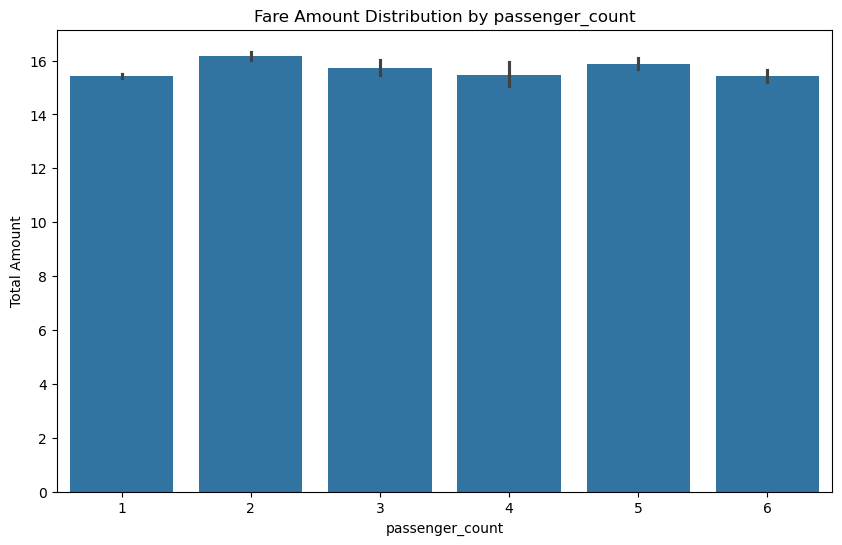

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x="passenger_count",  
    y="total_amount"
)

plt.title("Fare Amount Distribution by passenger_count")
plt.xlabel("passenger_count")
plt.ylabel("Total Amount")
plt.show()

In [30]:
df.to_csv("cleaned_data1.csv", index=False)

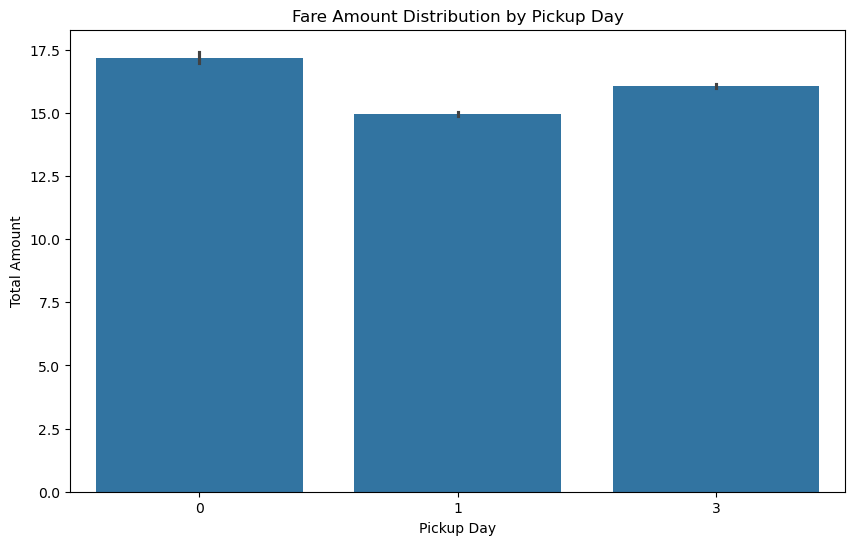

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x="pickup_day",  
    y="total_amount"
)

plt.title("Fare Amount Distribution by Pickup Day")
plt.xlabel("Pickup Day")
plt.ylabel("Total Amount")
plt.show()

#### outliers

In [32]:
df.columns

Index(['VendorID', 'passenger_count', 'RatecodeID', 'payment_type',
       'total_amount', 'trip_distance_haversine', 'pickup_day', 'is_weekend',
       'hour', 'is_night'],
      dtype='object')

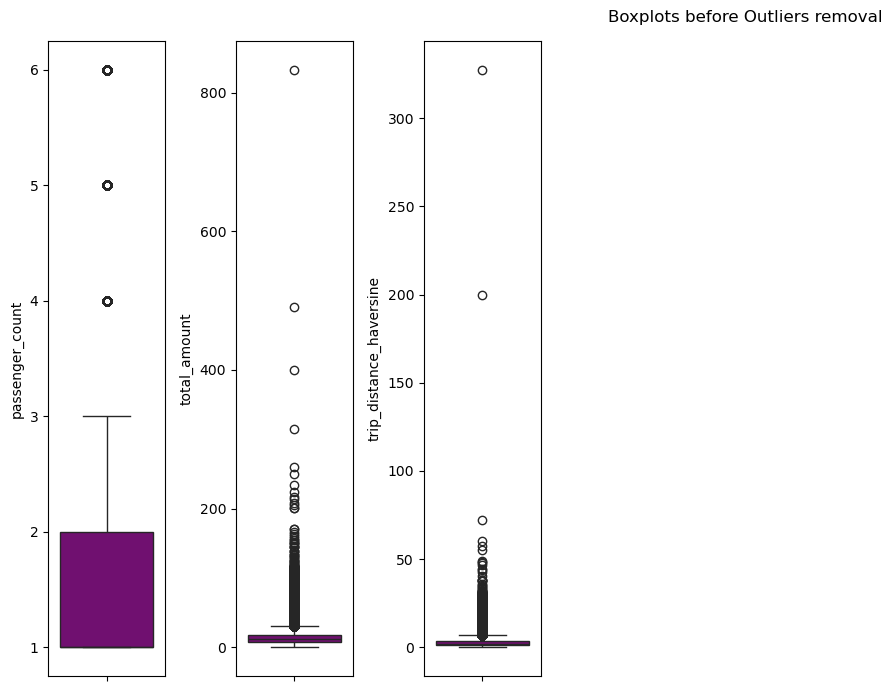

In [33]:
numerical_cols = [ 'passenger_count', 'total_amount', 'trip_distance_haversine']

plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots before Outliers removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[numerical_cols[i]],color='purple')
    plt.tight_layout()

In [37]:
import numpy as np
numerical_cols=['total_amount', 'trip_distance_haversine']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1 

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print(col)
    print(lower,upper)


total_amount
-4.989999999999998 30.45
trip_distance_haversine
-2.4200284779308348 7.163380711607768


In [38]:
df1=pd.read_csv("cleaned_data1.csv")

In [39]:
for col in numerical_cols:

    Q1 = df1[col].quantile(0.25) 
    Q3 = df1[col].quantile(0.75)  
    IQR = Q3 - Q1 

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df1[col] = np.where(df1[col] < lower, lower, df1[col])
    df1[col] = np.where(df1[col] > upper, upper, df1[col])
df1.shape

(209412, 10)

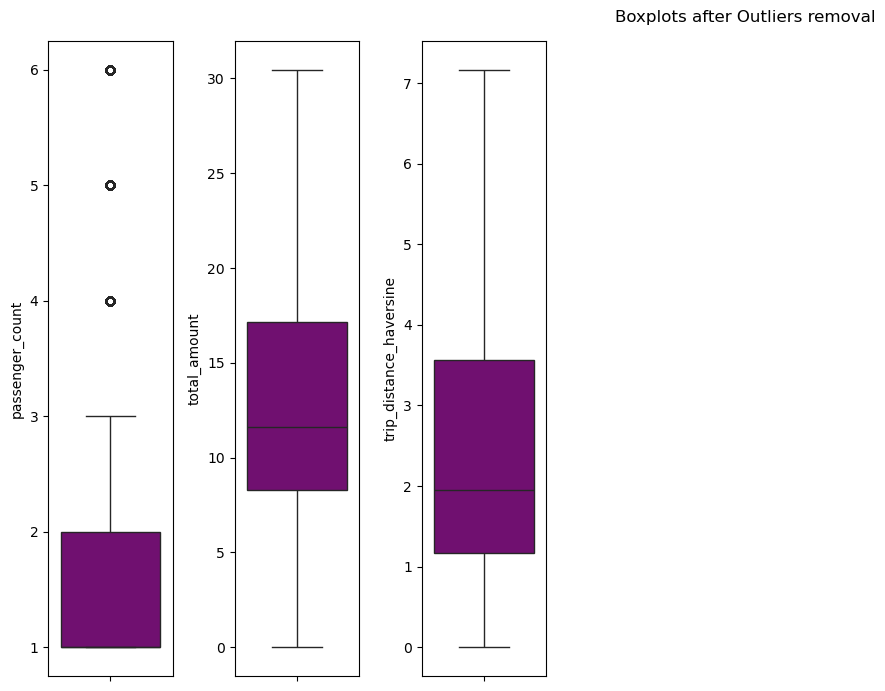

In [40]:
numerical_cols = [ 'passenger_count', 'total_amount', 'trip_distance_haversine']

plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots after Outliers removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df1[numerical_cols[i]],color='purple')
    plt.tight_layout()

In [41]:
df1.to_csv("out_rem1.csv",index=False)

#### skewness

In [42]:
df2=pd.read_csv("out_rem1.csv")
numerical_cols = [ 'passenger_count', 'total_amount', 'trip_distance_haversine']
skewness = df2[numerical_cols].skew()
skewness


passenger_count            1.881957
total_amount               1.036443
trip_distance_haversine    1.090200
dtype: float64

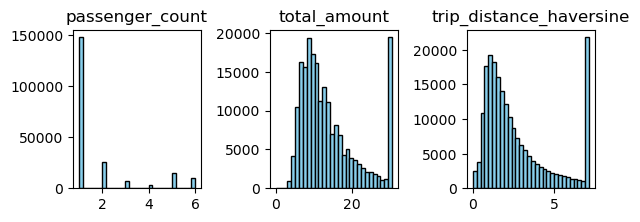

In [43]:
skewed_cols = skewness[abs(skewness) > 0.5].index

plt.figure(figsize=(16, 8))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(4, 8, i)  
    plt.hist(df2[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [44]:
n_col = ['total_amount', 'trip_distance_haversine']
for col in n_col:
    log_data = np.log1p(df2[col].clip(lower=0))
    sqrt_data = np.sqrt(df2[col].clip(lower=0)) 

    log_skew = log_data.skew()
    sqrt_skew = sqrt_data.skew()
    orig_skew = df2[col].skew()
    
    print(f"Column: {col}")
    print(f"Original skewness: {orig_skew:.4f}")
    print(f"Log transform skewness: {log_skew:.4f}")
    print(f"Sqrt transform skewness: {sqrt_skew:.4f}")
    print("-" * 50)

Column: total_amount
Original skewness: 1.0364
Log transform skewness: 0.2657
Sqrt transform skewness: 0.6503
--------------------------------------------------
Column: trip_distance_haversine
Original skewness: 1.0902
Log transform skewness: 0.3639
Sqrt transform skewness: 0.5234
--------------------------------------------------


In [45]:
df2[n_col] = df2[n_col].apply(lambda x: np.log1p(x))

In [46]:
df_tree=pd.read_csv("out_rem1.csv")
numerical_cols = [ 'passenger_count', 'total_amount', 'trip_distance_haversine']
skewness = df_tree[numerical_cols].skew()
skewness


passenger_count            1.881957
total_amount               1.036443
trip_distance_haversine    1.090200
dtype: float64

### categorical

In [47]:
cat_cols=['VendorID','RatecodeID',
       'payment_type','pickup_day', 'is_weekend', 'hour',
       'is_night']

In [48]:
n_cols = ['VendorID','RatecodeID','payment_type']
df2 = pd.get_dummies(df2, columns=n_cols, prefix=n_cols, dtype=int)
df2.head()

,passenger_count,total_amount,trip_distance_haversine,pickup_day,is_weekend,hour,is_night,VendorID_1,VendorID_2,RatecodeID_1,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_6,RatecodeID_99,payment_type_1,payment_type_2,payment_type_3,payment_type_4
0,1,2.591516,1.420236,0,0,19,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,1,2.794228,1.668335,0,0,19,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,2,3.448399,2.099658,0,0,19,0,0,1,1,0,0,0,0,0,0,1,0,0,0
3,3,3.448399,2.099658,0,0,19,0,0,1,1,0,0,0,0,0,0,1,0,0,0
4,5,3.448399,2.099658,0,0,19,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [49]:
n_cols = ['VendorID','RatecodeID','payment_type']
df_tree = pd.get_dummies(df_tree, columns=n_cols, prefix=n_cols, dtype=int)
df_tree.head()

,passenger_count,total_amount,trip_distance_haversine,pickup_day,is_weekend,hour,is_night,VendorID_1,VendorID_2,RatecodeID_1,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_6,RatecodeID_99,payment_type_1,payment_type_2,payment_type_3,payment_type_4
0,1,12.35,3.138096,0,0,19,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,1,15.35,4.303331,0,0,19,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,2,30.45,7.163381,0,0,19,0,0,1,1,0,0,0,0,0,0,1,0,0,0
3,3,30.45,7.163381,0,0,19,0,0,1,1,0,0,0,0,0,0,1,0,0,0
4,5,30.45,7.163381,0,0,19,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [50]:
import pandas as pd

def bin_hours(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df2['hour_bin'] = df2['hour'].apply(bin_hours)
df2.head()

,passenger_count,total_amount,trip_distance_haversine,pickup_day,is_weekend,hour,is_night,VendorID_1,VendorID_2,RatecodeID_1,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_6,RatecodeID_99,payment_type_1,payment_type_2,payment_type_3,payment_type_4,hour_bin
0,1,2.591516,1.420236,0,0,19,0,1,0,1,0,0,0,0,0,0,1,0,0,0,Evening
1,1,2.794228,1.668335,0,0,19,0,1,0,1,0,0,0,0,0,0,1,0,0,0,Evening
2,2,3.448399,2.099658,0,0,19,0,0,1,1,0,0,0,0,0,0,1,0,0,0,Evening
3,3,3.448399,2.099658,0,0,19,0,0,1,1,0,0,0,0,0,0,1,0,0,0,Evening
4,5,3.448399,2.099658,0,0,19,0,0,1,0,0,1,0,0,0,0,1,0,0,0,Evening


In [51]:
df2 = pd.get_dummies(df2, columns=["hour_bin"], dtype=int)
df2.head()

,passenger_count,total_amount,trip_distance_haversine,pickup_day,is_weekend,hour,is_night,VendorID_1,VendorID_2,RatecodeID_1,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_6,RatecodeID_99,payment_type_1,payment_type_2,payment_type_3,payment_type_4,hour_bin_Evening,hour_bin_Morning,hour_bin_Night
0,1,2.591516,1.420236,0,0,19,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,2.794228,1.668335,0,0,19,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,2,3.448399,2.099658,0,0,19,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,3,3.448399,2.099658,0,0,19,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,5,3.448399,2.099658,0,0,19,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [52]:
df2.to_csv("sh_en_data1.csv",index=False)

### correlation

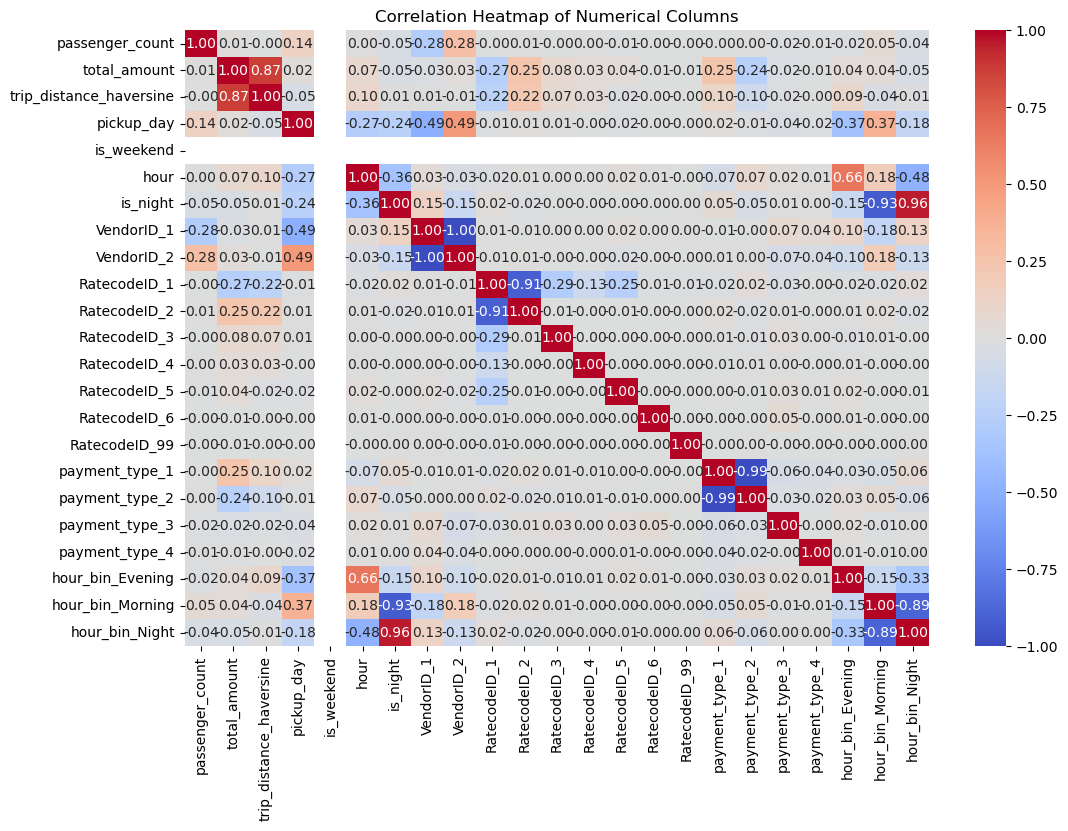

In [53]:

corr_matrix = df2.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [54]:
from sklearn.ensemble import RandomForestRegressor

df3 = df2.copy()

X = df3.drop(columns=['total_amount'])
y = df3['total_amount']

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                    Feature  Importance
1   trip_distance_haversine    0.901591
4                      hour    0.028723
15           payment_type_1    0.028530
0           passenger_count    0.012512
8              RatecodeID_1    0.009332
2                pickup_day    0.007656
6                VendorID_1    0.002981
7                VendorID_2    0.002770
20         hour_bin_Morning    0.001292
5                  is_night    0.000969
21           hour_bin_Night    0.000906
9              RatecodeID_2    0.000770
16           payment_type_2    0.000660
12             RatecodeID_5    0.000508
17           payment_type_3    0.000282
19         hour_bin_Evening    0.000264
10             RatecodeID_3    0.000144
18           payment_type_4    0.000047
11             RatecodeID_4    0.000027
14            RatecodeID_99    0.000019
13             RatecodeID_6    0.000015
3                is_weekend    0.000000


In [55]:
df2.columns

Index(['passenger_count', 'total_amount', 'trip_distance_haversine',
       'pickup_day', 'is_weekend', 'hour', 'is_night', 'VendorID_1',
       'VendorID_2', 'RatecodeID_1', 'RatecodeID_2', 'RatecodeID_3',
       'RatecodeID_4', 'RatecodeID_5', 'RatecodeID_6', 'RatecodeID_99',
       'payment_type_1', 'payment_type_2', 'payment_type_3', 'payment_type_4',
       'hour_bin_Evening', 'hour_bin_Morning', 'hour_bin_Night'],
      dtype='object')

In [56]:
df_sel = df2[
    [
        'trip_distance_haversine',
        'hour',
        'passenger_count',
        'pickup_day',
        'VendorID_1',
        'VendorID_2',
        'RatecodeID_1',
        'RatecodeID_2',
        'RatecodeID_3',
        'RatecodeID_4',
        'RatecodeID_5',
        'RatecodeID_6',
        'RatecodeID_99',
        'payment_type_1',
        'payment_type_2',
        'payment_type_3',
        'payment_type_4',
        'total_amount'
    ]
]

df_sel.head()

,trip_distance_haversine,hour,passenger_count,pickup_day,VendorID_1,VendorID_2,RatecodeID_1,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_6,RatecodeID_99,payment_type_1,payment_type_2,payment_type_3,payment_type_4,total_amount
0,1.420236,19,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2.591516
1,1.668335,19,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2.794228
2,2.099658,19,2,0,0,1,1,0,0,0,0,0,0,1,0,0,0,3.448399
3,2.099658,19,3,0,0,1,1,0,0,0,0,0,0,1,0,0,0,3.448399
4,2.099658,19,5,0,0,1,0,0,1,0,0,0,0,1,0,0,0,3.448399


In [57]:
df_sel.head(3)

,trip_distance_haversine,hour,passenger_count,pickup_day,VendorID_1,VendorID_2,RatecodeID_1,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_6,RatecodeID_99,payment_type_1,payment_type_2,payment_type_3,payment_type_4,total_amount
0,1.420236,19,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2.591516
1,1.668335,19,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2.794228
2,2.099658,19,2,0,0,1,1,0,0,0,0,0,0,1,0,0,0,3.448399


In [58]:
df_sel.to_csv("final.csv",index=False)

In [59]:
cols = [
    'trip_distance_haversine',
    'hour',
    'passenger_count',
    'pickup_day',
    'VendorID_1',
    'VendorID_2',
    'RatecodeID_1',
    'RatecodeID_2',
    'RatecodeID_3',
    'RatecodeID_4',
    'RatecodeID_5',
    'RatecodeID_6',
    'RatecodeID_99',
    'payment_type_1',
    'payment_type_2',
    'payment_type_3',
    'payment_type_4',
    'total_amount'
]

df_tree = df_tree[cols].copy()
df_tree.head()

,trip_distance_haversine,hour,passenger_count,pickup_day,VendorID_1,VendorID_2,RatecodeID_1,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_6,RatecodeID_99,payment_type_1,payment_type_2,payment_type_3,payment_type_4,total_amount
0,3.138096,19,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,12.35
1,4.303331,19,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,15.35
2,7.163381,19,2,0,0,1,1,0,0,0,0,0,0,1,0,0,0,30.45
3,7.163381,19,3,0,0,1,1,0,0,0,0,0,0,1,0,0,0,30.45
4,7.163381,19,5,0,0,1,0,0,1,0,0,0,0,1,0,0,0,30.45


In [60]:
df_tree.to_csv("final2.csv",index=False)

In [61]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [62]:
df_sel1=df_sel.sample(frac=0.50, random_state=42)
df_sel1.shape

(104706, 18)

In [63]:
df_f=df_tree.sample(frac=0.50, random_state=42)
df_f.shape

(104706, 18)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

X = df_sel1.drop('total_amount', axis=1)
y = df_sel1['total_amount']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

num_cols = ['trip_distance_haversine', 'passenger_count']
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

joblib.dump(scaler, "scaler.pkl")

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred = lin_reg.predict(X_test_scaled)

print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

Linear Regression
MAE: 0.15466260162169432
MSE: 0.04352635016885213
RMSE: 0.20862969627752453
R²: 0.8026968671767463


In [65]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X = df_f.drop('total_amount', axis=1)
y = df_f['total_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "XGBRegressor": XGBRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(name)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred)) 
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²:", r2_score(y_test, y_pred))


XGBRegressor
MAE: 1.8887593585535671
MSE: 7.215637886468249
RMSE: 2.6861939405910826
R²: 0.8678667761477933
DecisionTree
MAE: 2.6061815514218476
MSE: 13.876363267728507
RMSE: 3.7250990950213
R²: 0.7458951456879795
RandomForest
MAE: 2.0611980695890475
MSE: 8.525797150141996
RMSE: 2.919896770459873
R²: 0.8438750556661301
GradientBoosting
MAE: 1.8782322130682125
MSE: 7.06426129746962
RMSE: 2.657867810382905
R²: 0.8706387939561772


In [48]:
import joblib

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
joblib.dump(model, "final_tr.pkl")


['final_tr.pkl']

In [50]:
imp = pd.Series(
    model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(imp.head(10))


trip_distance_haversine    0.891118
payment_type_1             0.050925
hour                       0.045079
pickup_day                 0.010431
RatecodeID_3               0.001374
RatecodeID_1               0.000447
RatecodeID_4               0.000175
payment_type_2             0.000139
VendorID_2                 0.000096
VendorID_1                 0.000089
dtype: float64


In [ ]:
y_train_pred = model.predict(X_train) 
train_r2 = r2_score(y_train, y_train_pred)
train_r2

### GradientBoosting


In [66]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = df_f.drop('total_amount', axis=1)
y = df_f['total_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(random_state=42)

param_dist = {
    "n_estimators": [100, 200, 300, 400],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5, 6],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=20,           
    cv=3,     
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1          
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

y_pred = best_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 4, 'learning_rate': 0.1}
MAE: 1.8691630186033772
MSE: 7.0294640220607105
RMSE: 2.6513136408317877
R²: 0.871276003895672


In [67]:
best_params = random_search.best_params_
final_model = GradientBoostingRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=4, min_samples_split=10,
                          random_state=42)

In [68]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(final_model, X, y, cv=5, scoring="r2")
print("Cross-validated R²:", scores.mean())

Cross-validated R²: 0.8712539353211319


In [70]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(final_model, X, y, cv=kf, scoring='r2')
print(f"All 5-Fold Scores: {cv_scores}")
print()
print(f"Mean R2 Score: {np.mean(cv_scores):.4f}")

All 5-Fold Scores: [0.871276   0.87005903 0.87400669 0.86655738 0.87551464]

Mean R2 Score: 0.8715


In [69]:
import joblib
joblib.dump(final_model, "gb_model.pkl")

['gb_model.pkl']